In [1]:
#Importamos las librerias necesarias
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#Se crea la compuerta
X_gate = np.array([
    1, 1,
    1, 0,
    0, 1,
    0, 0
]).reshape(4, 2)

xor = np.array([0, 1, 1, 0]).reshape(4,)
or_ = np.array([1, 1, 1, 0]).reshape(4,)
and_ = np.array([1, 0, 0, 0]).reshape(4,)
nand_ = np.array([0, 1, 1, 1]).reshape(4,)

In [5]:
#Imprimimos las compuertas
print(xor, 'XOR')
print('------------')
print(or_, 'OR')
print('------------')
print(and_ ,'AND')
print('------------')
print(nand_,'NAND')

[0 1 1 0] XOR
------------
[1 1 1 0] OR
------------
[1 0 0 0] AND
------------
[0 1 1 1] NAND


# __XOR__

In [6]:
import tensorflow as tf

In [7]:
# 12548667
tf.random.set_seed(25)  # Establecer la semilla (resultados reproducibles)
tf.keras.backend.clear_session()

model = tf.keras.Sequential() # redes completamente conectadas

model.add(tf.keras.layers.Input(shape=(2,))) # capa de entrada
model.add(tf.keras.layers.Dense(5, activation="sigmoid")) # capa oculta 1
model.add(tf.keras.layers.Dense(5, activation="sigmoid")) # capa oculta 2
model.add(tf.keras.layers.Dense(1, activation="sigmoid")) # capa de salida

In [8]:
#Se muestra un resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [10]:
#revisamos las capas del modelo
print(model.layers)

[<keras.layers.core.dense.Dense object at 0x7efd9c6c7ca0>, <keras.layers.core.dense.Dense object at 0x7efd9c61d4e0>, <keras.layers.core.dense.Dense object at 0x7efd9c61dd20>]


In [11]:
#Obtenemos los pesos del modelo
model.get_weights()

[array([[ 0.80763674, -0.8944551 , -0.31253874, -0.8697083 , -0.67002714],
        [ 0.00500757, -0.8252112 , -0.09062886,  0.20976782, -0.8355433 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.41662174,  0.66697156, -0.5512529 ,  0.38627613, -0.03353721],
        [ 0.43941367,  0.24070704,  0.2765937 ,  0.41934597, -0.22836792],
        [ 0.34578347,  0.6223893 , -0.43053892,  0.43529475, -0.57674277],
        [-0.5132443 , -0.76136243, -0.63648486,  0.14216143,  0.42769694],
        [ 0.61897814, -0.6599261 ,  0.38676143, -0.5577708 , -0.14598554]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.09771442],
        [-0.47961116],
        [ 0.16269445],
        [ 0.28894544],
        [-0.8419061 ]], dtype=float32),
 array([0.], dtype=float32)]

In [12]:
#revisamos los pesos y el bias (umbral) de la capa 1
weights, bias = model.layers[1].get_weights()

In [14]:
#se muestran los pesos de las 5 neuronas.
#por cada entrada un peso.
#como son dos entradas la cantidad de pesos es 5 x 5
weights

array([[-0.41662174,  0.66697156, -0.5512529 ,  0.38627613, -0.03353721],
       [ 0.43941367,  0.24070704,  0.2765937 ,  0.41934597, -0.22836792],
       [ 0.34578347,  0.6223893 , -0.43053892,  0.43529475, -0.57674277],
       [-0.5132443 , -0.76136243, -0.63648486,  0.14216143,  0.42769694],
       [ 0.61897814, -0.6599261 ,  0.38676143, -0.5577708 , -0.14598554]],
      dtype=float32)

In [15]:
#Se obtiene el valor del umbral o el bias de las neuronas
bias

array([0., 0., 0., 0., 0.], dtype=float32)

In [16]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.5),
              loss=tf.keras.losses.binary_crossentropy,
              metrics='accuracy')

In [17]:
model.fit(X_gate, xor, epochs=200)

Epoch 1/200
1/1 [==============================] - 5s 5s/step - loss: 0.7197 - accuracy: 0.5000
Epoch 2/200
1/1 [==============================] - 0s 12ms/step - loss: 0.7070 - accuracy: 0.5000
Epoch 3/200
1/1 [==============================] - 0s 12ms/step - loss: 0.7005 - accuracy: 0.5000
Epoch 4/200
1/1 [==============================] - 0s 11ms/step - loss: 0.6973 - accuracy: 0.5000
Epoch 5/200
1/1 [==============================] - 0s 11ms/step - loss: 0.6957 - accuracy: 0.5000
Epoch 6/200
1/1 [==============================] - 0s 11ms/step - loss: 0.6949 - accuracy: 0.5000
Epoch 7/200
1/1 [==============================] - 0s 10ms/step - loss: 0.6945 - accuracy: 0.5000
Epoch 8/200
1/1 [==============================] - 0s 10ms/step - loss: 0.6943 - accuracy: 0.5000
Epoch 9/200
1/1 [==============================] - 0s 13ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 10/200
1/1 [==============================] - 0s 10ms/step - loss: 0.6941 - accuracy: 0.2500
Epoch 11/200
1/1 [===

In [18]:
#Revisamos los valores de los pesos
model.get_weights()

[array([[ 0.8042115 , -0.84443706, -0.30977905, -0.868341  , -0.6478922 ],
        [-0.0103424 , -0.773547  , -0.08308011,  0.21232487, -0.8135985 ]],
       dtype=float32),
 array([-0.00118125,  0.02656887,  0.00702949,  0.00209128,  0.01143929],
       dtype=float32),
 array([[-0.42145133,  0.6494217 , -0.54286826,  0.40160632, -0.06275446],
        [ 0.44904864,  0.2967242 ,  0.24452436,  0.35456663, -0.12756869],
        [ 0.34244558,  0.61317766, -0.43020865,  0.44101727, -0.597925  ],
        [-0.5179905 , -0.7786853 , -0.63496035,  0.15465346,  0.39019367],
        [ 0.6254068 , -0.6193579 ,  0.36317772, -0.6044768 , -0.07623559]],
       dtype=float32),
 array([-0.00789804, -0.02577907,  0.00620202,  0.01894454, -0.05043846],
       dtype=float32),
 array([[-0.1444549 ],
        [-0.32711858],
        [ 0.14706902],
        [ 0.43898934],
        [-0.6869813 ]], dtype=float32),
 array([0.23109606], dtype=float32)]

In [20]:
#Obtenemos los pesos y los bias de la primera capa, despues de la tener la red
#entrenada
weights, bias = model.layers[0].get_weights()

In [21]:
weights

array([[ 0.8042115 , -0.84443706, -0.30977905, -0.868341  , -0.6478922 ],
       [-0.0103424 , -0.773547  , -0.08308011,  0.21232487, -0.8135985 ]],
      dtype=float32)

In [22]:
bias

array([-0.00118125,  0.02656887,  0.00702949,  0.00209128,  0.01143929],
      dtype=float32)

In [23]:
#Una función para la función de activación sigmoide
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [24]:
#Función para visualizar los resultados
def plot_line(layer, X_gate):
  weights, bias = layer.get_weights()
  n_neurons = weights.shape[1]
  X = np.array([-0.2, 1.2])
  fig, axes = plt.subplots(1, n_neurons, figsize=(8 * n_neurons, 6))
  def predictions(X, weights, bias):
    z = X_gate.dot(weights) + bias
    return np.round(sigmoid(z), 0)
  for i in range(n_neurons):
    x_2 = (-weights[0, i] * X - bias[i]) / weights[1, i]

    y = predictions(X_gate, weights[:, i],  bias[i] )
    if type(axes) == np.ndarray:
      axes[i].scatter(X_gate[:,0], X_gate[:,1],
                      c=y,
                      s=300,
                      cmap=plt.cm.coolwarm,
                      alpha=0.8)
      axes[i].grid()
      axes[i].plot(X, x_2, color='dimgray', linewidth=4)
      axes[i].set_xlim([-0.1, 1.1])
      axes[i].set_ylim([-0.1, 1.1])
      axes[i].set_title(f'N{i}: {y}')
    else:
      axes.scatter(X_gate[:,0], X_gate[:,1],
                   c=y,
                   s=300,
                   cmap=plt.cm.coolwarm,
                   edgecolor='black',
                   alpha=0.8)
      axes.grid()
      axes.plot(X, x_2, color='dimgray', linewidth=4)
      axes.set_xlim([-0.1, 1.1])
      axes.set_ylim([-0.1, 1.1])
      axes.set_title(f'N{i}: {y}')

In [34]:
layer_1=model.layers[0]
weights_1, bias_1 = layer_1.get_weights()
n_neurons_1 = weights_1.shape[1]
print(weights_1)
print('--------------')
print(bias_1)
print('--------------')
print(n_neurons_1)
print('--------------')



[[ 0.8042115  -0.84443706 -0.30977905 -0.868341   -0.6478922 ]
 [-0.0103424  -0.773547   -0.08308011  0.21232487 -0.8135985 ]]
--------------
[-0.00118125  0.02656887  0.00702949  0.00209128  0.01143929]
--------------
5
--------------


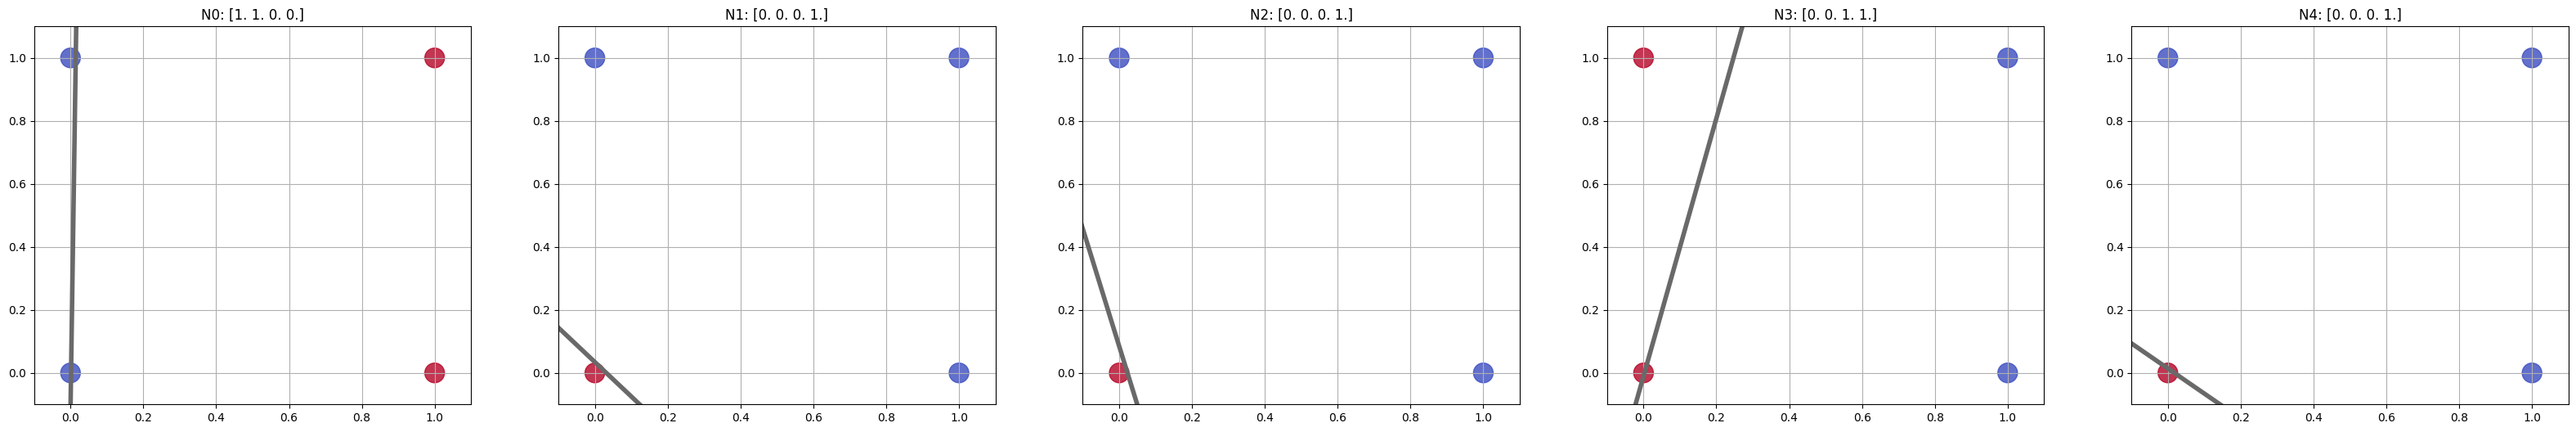

In [25]:
plot_line(model.layers[0], X_gate)

In [36]:
layer_2=model.layers[1]
weights_2, bias_2 = layer_2.get_weights()
n_neurons_2 = weights_1.shape[1]
print(weights_2)
print('--------------')
print(bias_2)
print('--------------')
print(n_neurons_2)
print('--------------')


[[-0.42145133  0.6494217  -0.54286826  0.40160632 -0.06275446]
 [ 0.44904864  0.2967242   0.24452436  0.35456663 -0.12756869]
 [ 0.34244558  0.61317766 -0.43020865  0.44101727 -0.597925  ]
 [-0.5179905  -0.7786853  -0.63496035  0.15465346  0.39019367]
 [ 0.6254068  -0.6193579   0.36317772 -0.6044768  -0.07623559]]
--------------
[-0.00789804 -0.02577907  0.00620202  0.01894454 -0.05043846]
--------------
5
--------------


In [38]:
#plot_line(model.layers[1], X_gate)

In [39]:
#Se hace la predicción del modelo
np.round(model.predict(X_gate), 0)

1/1 [==============================] - 0s 83ms/step


array([[0.],
       [0.],
       [1.],
       [1.]], dtype=float32)

# __OR__

In [ ]:
model.fit(X_gate, or_, epochs=200)
plot_line(model.layers[0], X_gate)

# __AND__

In [ ]:
model.fit(X_gate, and_, epochs=200)
plot_line(model.layers[0], X_gate)

# __NAND__

Epoch 1/200
1/1 [==============================] - 0s 17ms/step - loss: 4.2181 - accuracy: 0.0000e+00
Epoch 2/200
1/1 [==============================] - 0s 18ms/step - loss: 3.2623 - accuracy: 0.0000e+00
Epoch 3/200
1/1 [==============================] - 0s 18ms/step - loss: 2.5176 - accuracy: 0.5000
Epoch 4/200
1/1 [==============================] - 0s 16ms/step - loss: 2.3403 - accuracy: 0.5000
Epoch 5/200
1/1 [==============================] - 0s 16ms/step - loss: 2.2197 - accuracy: 0.5000
Epoch 6/200
1/1 [==============================] - 0s 15ms/step - loss: 2.1106 - accuracy: 0.5000
Epoch 7/200
1/1 [==============================] - 0s 15ms/step - loss: 2.0072 - accuracy: 0.5000
Epoch 8/200
1/1 [==============================] - 0s 15ms/step - loss: 1.9080 - accuracy: 0.5000
Epoch 9/200
1/1 [==============================] - 0s 12ms/step - loss: 1.8126 - accuracy: 0.5000
Epoch 10/200
1/1 [==============================] - 0s 11ms/step - loss: 1.7211 - accuracy: 0.5000
Epoch 11/20

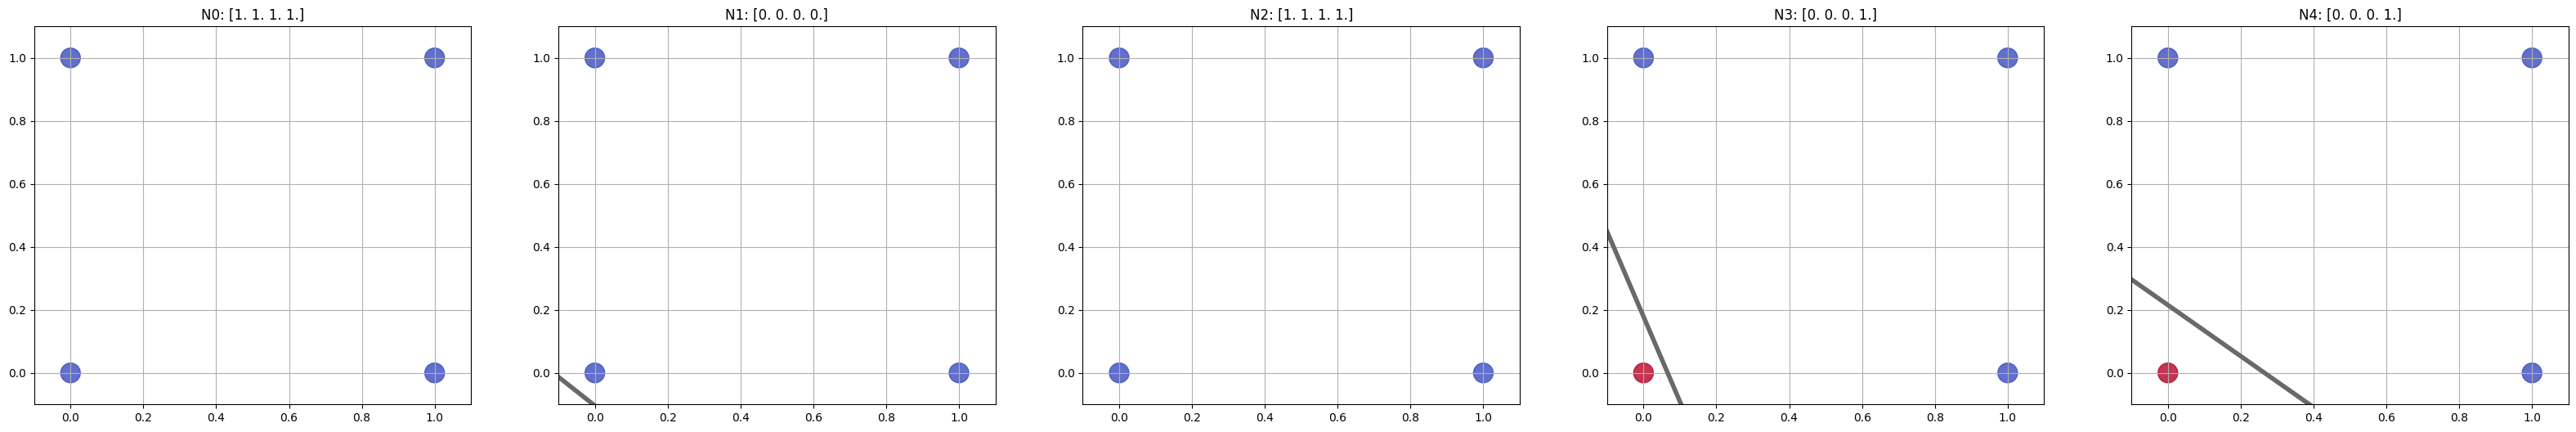

In [48]:
model.fit(X_gate, nand_, epochs=200)
plot_line(model.layers[0], X_gate)

# __Tablas de verdad__

In [ ]:
!pip install truth-table-generator

In [42]:
import ttg

table = ttg.Truths(['x_1', 'x_2'],['x_1 xor x_2'])
print(table)

+-------+-------+---------------+
|  x_1  |  x_2  |  x_1 xor x_2  |
|-------+-------+---------------|
|   1   |   1   |       0       |
|   1   |   0   |       1       |
|   0   |   1   |       1       |
|   0   |   0   |       0       |
+-------+-------+---------------+


In [43]:
table_ = ttg.Truths(['In_1', 'In_2'],['In_1 xor In_2'])
print(table_)

+--------+--------+-----------------+
|  In_1  |  In_2  |  In_1 xor In_2  |
|--------+--------+-----------------|
|   1    |   1    |        0        |
|   1    |   0    |        1        |
|   0    |   1    |        1        |
|   0    |   0    |        0        |
+--------+--------+-----------------+


In [44]:
table = ttg.Truths(['x_1', 'x_2'],['not( (x_1 or not(x_2)) and (not(x_1) or x_2)))'])
print(table)

+-------+-------+--------------------------------------------------+
|  x_1  |  x_2  |  not( (x_1 or not(x_2)) and (not(x_1) or x_2)))  |
|-------+-------+--------------------------------------------------|
|   1   |   1   |                        0                         |
|   1   |   0   |                        1                         |
|   0   |   1   |                        1                         |
|   0   |   0   |                        0                         |
+-------+-------+--------------------------------------------------+


In [45]:
table = ttg.Truths(['x_1', 'x_2'],['(x_1 or x_2) and not(x_1 and x_2)'])
print(table)

+-------+-------+-------------------------------------+
|  x_1  |  x_2  |  (x_1 or x_2) and not(x_1 and x_2)  |
|-------+-------+-------------------------------------|
|   1   |   1   |                  0                  |
|   1   |   0   |                  1                  |
|   0   |   1   |                  1                  |
|   0   |   0   |                  0                  |
+-------+-------+-------------------------------------+


In [ ]:
#Probar el modelo con las otras compuertas
